# Neural Network Classification LFW Face Database

Daniel Diaz.
Alejandro Suarez.

2019

http://vis-www.cs.umass.edu/lfw/

In [17]:
# Imports, tools, frameworks
from time import time
import warnings
import logging
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, r2_score
import scipy.io as sio
import numpy.matlib as mat
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_lfw_people

warnings.filterwarnings("ignore")
%matplotlib inline

### Data Collection & Data Preparation.

In [18]:
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
Y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


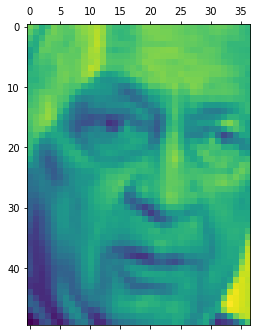

In [19]:
import matplotlib.pyplot as plt
plt.matshow(lfw_people.images[50])
plt.show()

### Define, Train, Tunning model

In [20]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [37]:
print("Fitting the classifier to the training set")
t0 = time()

parameters = {'solver': ['adam'], 'max_iter': [1000], 'alpha': 10.0 ** -np.arange(3, 5), 'hidden_layer_sizes':[512, 1024, 2048, 4092], 'random_state':[0, 1], 'early_stopping':[True]}

clf = GridSearchCV(MLPClassifier(), parameters, n_jobs = -1, cv = 3)
clf = clf.fit(X_train, y_train)

print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best applied model params:")
print(clf.best_params_)
print("Train Score: ")
print(clf.score(X_train, y_train))

Fitting the classifier to the training set
done in 500.317s
Best estimator found by grid search:
MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=2048, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Best applied model params:
{'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': 2048, 'max_iter': 1000, 'random_state': 1, 'solver': 'adam'}
Train Score: 
0.860248447204969


### Evaluation

In [36]:
# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names = target_names))
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

Predicting people's names on the test set
done in 0.082s
                   precision    recall  f1-score   support

     Ariel Sharon       0.58      0.54      0.56        13
     Colin Powell       0.83      0.72      0.77        60
  Donald Rumsfeld       0.67      0.52      0.58        27
    George W Bush       0.81      0.90      0.85       146
Gerhard Schroeder       0.83      0.40      0.54        25
      Hugo Chavez       0.62      0.67      0.65        15
       Tony Blair       0.58      0.78      0.67        36

        micro avg       0.75      0.75      0.75       322
        macro avg       0.70      0.65      0.66       322
     weighted avg       0.76      0.75      0.75       322

Confusion matrix
[[  7   1   2   2   0   0   1]
 [  2  43   1   8   0   0   6]
 [  1   3  14   7   1   0   1]
 [  2   2   3 131   1   2   5]
 [  0   1   0   8  10   3   3]
 [  0   1   0   0   0  10   4]
 [  0   1   1   5   0   1  28]]


In [32]:
# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

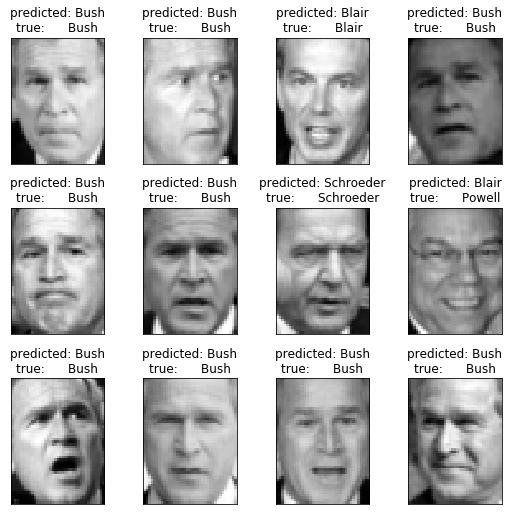

In [35]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)